## Обработка выбросов

Выбросы, или аномальные значения, представляют собой отклонения в данных, которые значительно отличаются от общего паттерна наблюдений. Они могут вносить существенные искажения в статистику и результаты анализа данных, делая важным их обнаружение и обработку. Выбросы могут возникнуть по различным причинам, включая ошибки в данных, аномалии в измерениях, или внештатные события.



<img src="https://www.writerscentre.com.au/wp-content/uploads/2020/05/diff.jpg" alt="min max formula" width="500" height="400">

Бывают разные виды выбросов, включая:

1. **Случайные выбросы:**
   - Это наблюдения, которые не подчиняются общему распределению данных и возникают случайным образом. Например, в медицинских измерениях роста, появление аномально низких значений может быть случайным результатом ошибки при измерении.

2. **Систематические выбросы:**
   - Эти выбросы обусловлены каким-то особым фактором или систематической ошибкой в сборе данных. Например, в экономических данных аномалии в росте дохода населения могут быть вызваны изменениями в методологии сбора данных.

3. **Выбросы из-за ошибок в данных:**
   - Ошибки в данных, такие как опечатки или некорректные измерения, могут привести к появлению выбросов. Например, в базе данных о температуре на кухне значения, сильно отличающиеся от общего тренда, могут быть результатом технической неисправности при измерении.

4. **Аномалии из-за внештатных событий:**
   - Выбросы могут возникнуть из-за внештатных событий, таких как стихийные бедствия, финансовые кризисы или другие неожиданные изменения условий. Например, в продажах товаров выбросы могут быть вызваны внезапным изменением потребительского спроса из-за внештатных обстоятельств.

Определение и обработка выбросов становятся важным этапом анализа данных, направленным на создание более точных и надежных моделей и выводов.

 Различные методы, включая статистические и машинное обучение, могут использоваться для выявления и управления этими аномалиями.

1. **Метод межквартильного размаха (IQR):**
   - Рассчитывается межквартильный размах (разница между третьим и первым квартилями). Выбросами считаются значения, находящиеся за пределами границ межквартильного размаха.
   - Формула: IQR = Q3 - Q1, выбросы: Нижняя граница = Q1 - k * IQR, Верхняя граница = Q3 + k * IQR, где k — коэффициент, обычно принимаемый равным 1.5, 3, или другим в зависимости от задачи.

2. **Z-оценка:**
   - Используется стандартная Z-оценка, чтобы определить, насколько далеко значение отклонено от среднего значения в терминах стандартных отклонений. Значения, которые находятся за пределами определенного порога (например, 3 стандартных отклонений), могут считаться выбросами.

3. **Метод крайних значений (Tukey's Fences):**
   - Этот метод схож с методом межквартильного размаха, но определяет выбросы на основе более сложной формулы. Границы определяются как
   
   Нижняя граница = Q1 - k * IQR и  Верхняя граница = Q3 + k * IQR, где k выбирается в зависимости от задачи.

4. **Метод обнаружения аномалий с использованием машинного обучения:**
   - Методы машинного обучения, такие как изолирующий лес (Isolation Forest) и одноклассовые методы, могут использоваться для выявления аномалий и выбросов в данных. Они основываются на том, что аномальные точки обычно имеют отличные характеристики.

5. **Визуальный анализ:**
   - Использование графиков, таких как ящик с усами (box plot) или диаграмма рассеяния (scatter plot), может помочь выявить выбросы визуально.

Выбор конкретной стратегии определения выбросов зависит от характера данных, предметной области и целей анализа. Важно оценить эффективность выбранного метода и учитывать особенности конкретной задачи.

<img src=https://cdn.discordapp.com/attachments/517815672613503006/874179036371386378/unknown.png>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid", palette="rainbow")
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [ ]:
df_normal = pd.read_csv("./data/water_potability.csv", usecols=["Sulfate"])
df_skew = pd.read_csv("./data/train.csv", usecols=["Fare"])

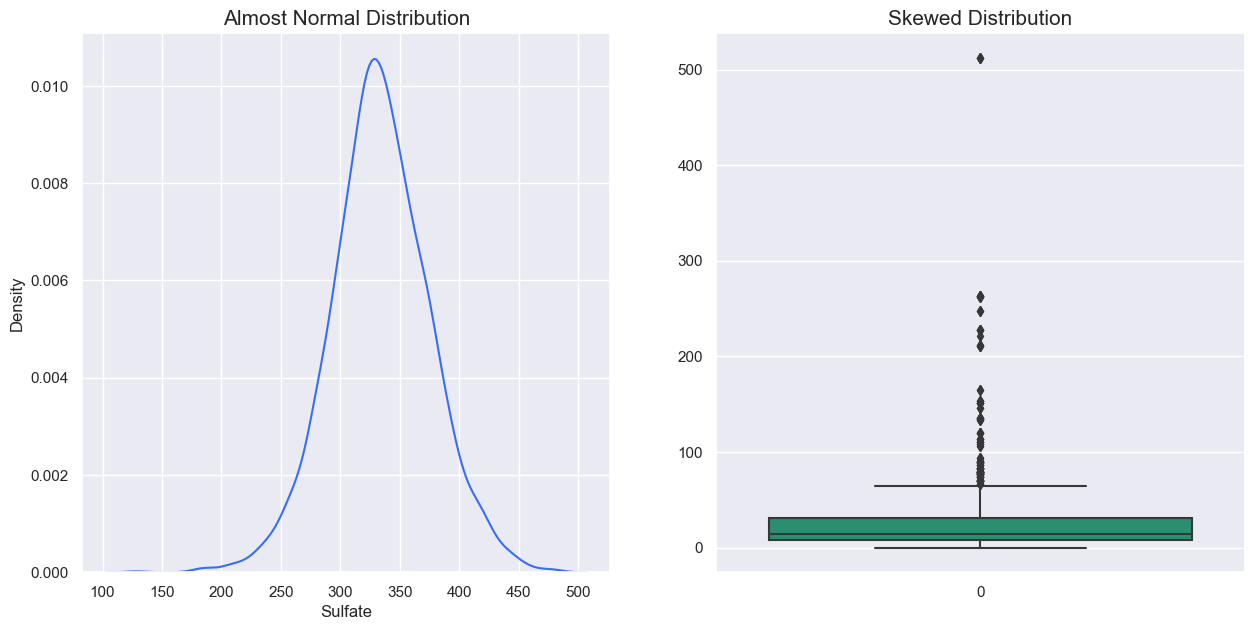

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Almost Normal Distribution", fontsize=15)
sns.kdeplot(data = df_normal["Sulfate"])
plt.subplot(1,2,2)
plt.title("Skewed Distribution", fontsize=15)
sns.boxplot(data = df_skew["Fare"], palette="Dark2")
plt.show()

### Как убрать выбросы?

1. Trimming - Обрезка - это метод отсечения или избавления от выбросов в конце набора данных. Это проще, чем все остальные методы.
2. Capping - Усечение - это установка предела для признака и установка значения всех промахов, превышающих предел, на значение предела.

Предположим, что в наборе данных об успеваемости студентов 98% учащихся набрали меньше 60 баллов, но только 2% - больше 85 баллов. В данном примере эти 2% студентов являются выбросами.

Так, в примере со студентом мы установим предельное количество баллов и изменим оценку 2%-ного студента на это значение. Например, 75 - это максимальный предел, который мы установили. Оценка 2% студентов-аутсайдеров будет установлена на 75.

3. Метод перцентиля - равный перцентиль с обеих сторон для выявления промахов.
Обнаружив эти отклонения, вы можете использовать обрезку или усечение, чтобы избавиться от них.

### Обрезка & Стандартное отклонение

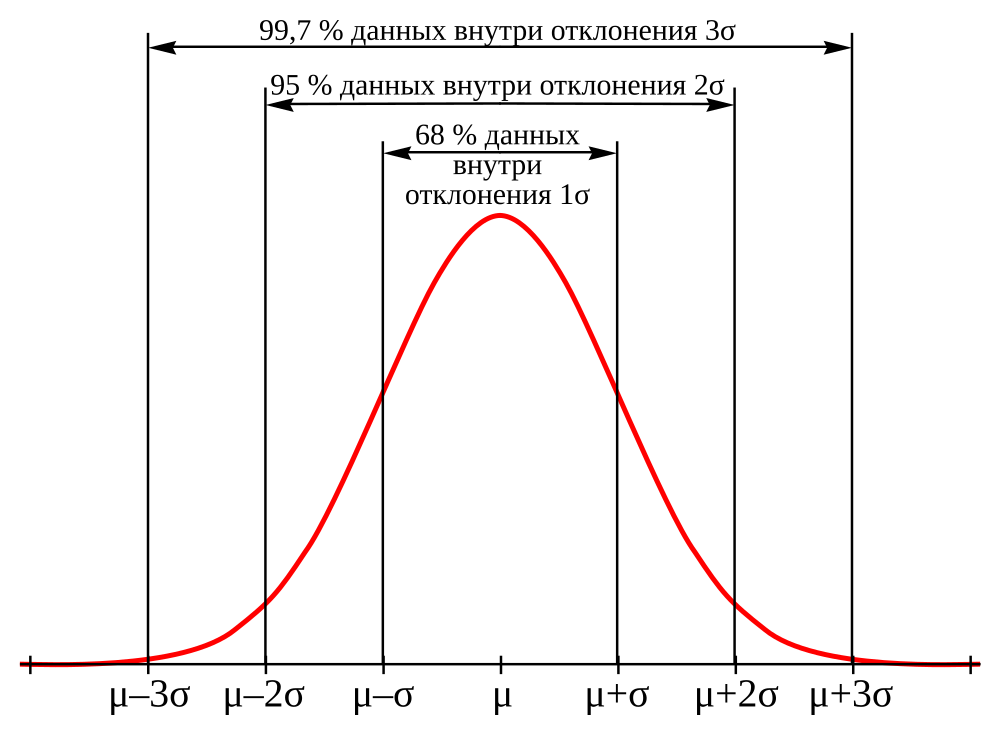

In [ ]:
# определим нижний и верхний пределы
# lower_limit = Q1 - 1.5 * IQR
# upper_limit = Q3 + 1.5 * IQR
norm_upper_limit = df_normal["Sulfate"].mean() + 3 * df_normal["Sulfate"].std()
norm_lower_limit = df_normal["Sulfate"].mean() - 3 * df_normal["Sulfate"].std()

In [ ]:
# отсекаем выбросы и получаем распределение с 3 стандартными отклонениями
df_normal_new = df_normal[(df_normal["Sulfate"] > norm_lower_limit) & (df_normal["Sulfate"] < norm_upper_limit)]

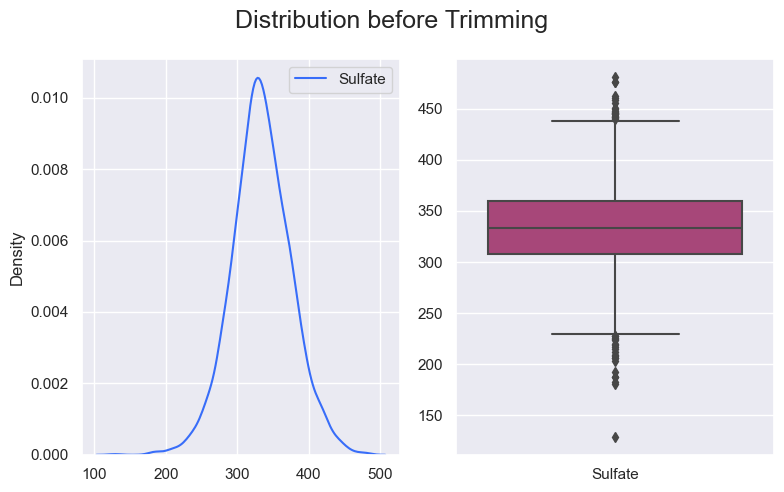

In [ ]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_normal)
plt.subplot(1,2,2)
sns.boxplot(data = df_normal, palette="magma")
plt.tight_layout()
plt.show()

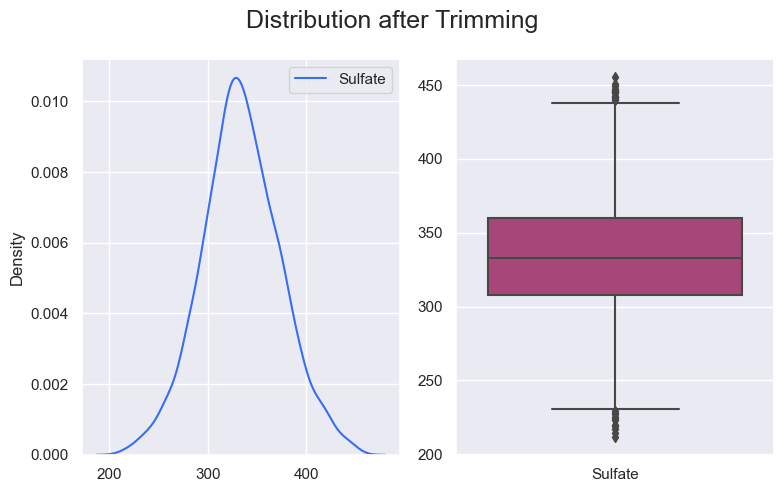

In [ ]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Trimming",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_normal_new)
plt.subplot(1,2,2)
sns.boxplot(data = df_normal_new, palette="magma")
plt.tight_layout()
plt.show()

Распределение не пострадало при использовании этого метода. Кроме того, мы избавились от выбросов. Одна плохая черта этого метода - потеря информации. Мы избавились от соответствующей информации о признаках, которая могла бы быть полезной для модели. Однако, как и отбрасывание нулевых значений, этот метод может привести к потере информации.

Примеры, когда просто отбрасываем строки с выбросами, могут включать ситуации, когда:

1. **Ошибка в измерениях:**
   - В медицинском исследовании, где выявленные значения явно ошибочны или некорректны, такие как нереалистично высокие или низкие показатели физиологических параметров.

2. **Технические сбои при измерении:**
   - В данных по измерениям с использованием технического оборудования, где выбросы могут быть следствием временных сбоев в работе оборудования.

3. **Финансовые транзакции:**
   - В данных финансовых транзакций, где отдельные транзакции могут быть отмечены как выбросы из-за необычно высоких или низких сумм.



***

### Усечение & Интерквартильный размах

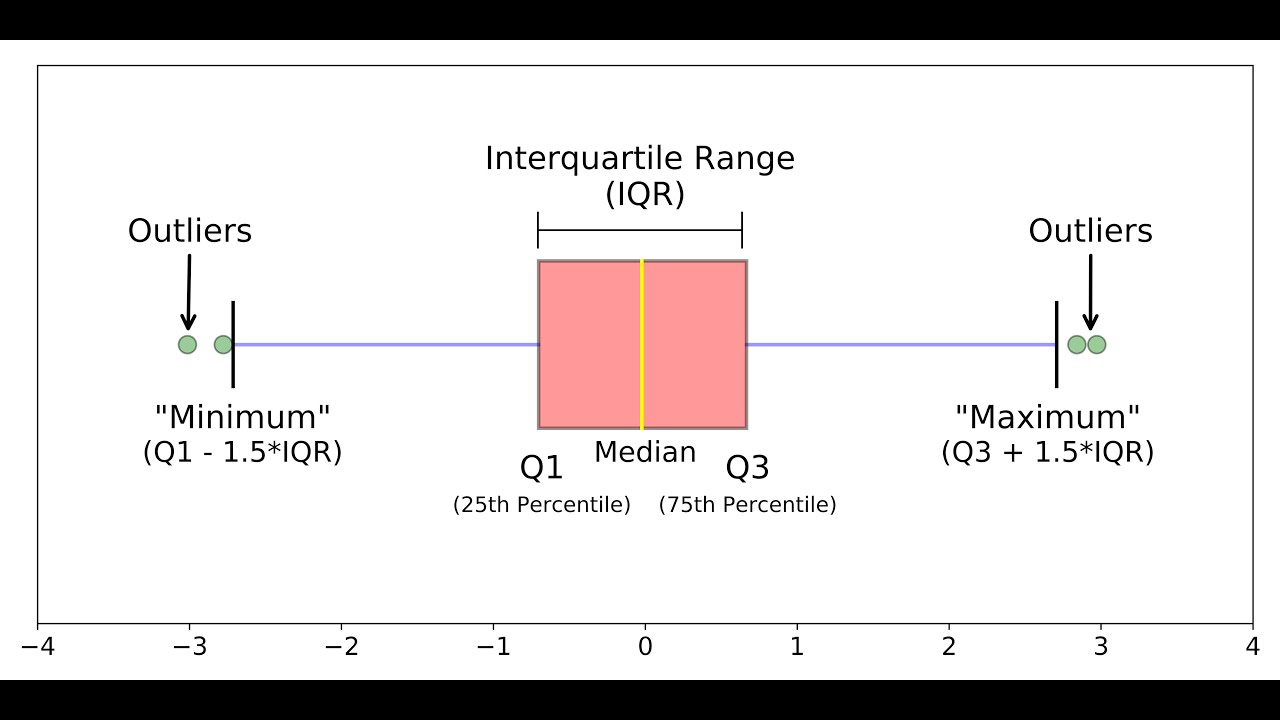

In [ ]:
# ищем Q1(25 перцентиль) и Q3(75 перцентиль)
q1 = df_skew["Fare"].quantile(0.25)
q2 = df_skew["Fare"].quantile(0.75)

In [ ]:
# определение значения межквартильного интервала
IQR = q2 - q1

In [ ]:
# определяем максимальную и минималную границы
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR)

In [ ]:
# усечение
df_skew_new = pd.DataFrame(np.where(df_skew["Fare"] > max_limit, max_limit,
         (np.where(df_skew["Fare"] < min_limit, min_limit, df_skew["Fare"]))), columns=["Fare"])

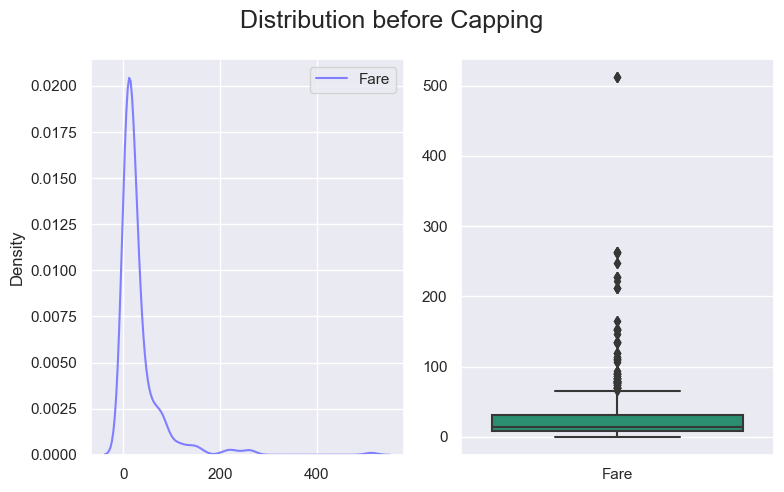

In [ ]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_skew, palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df_skew, palette="Dark2")
plt.tight_layout()
plt.show()

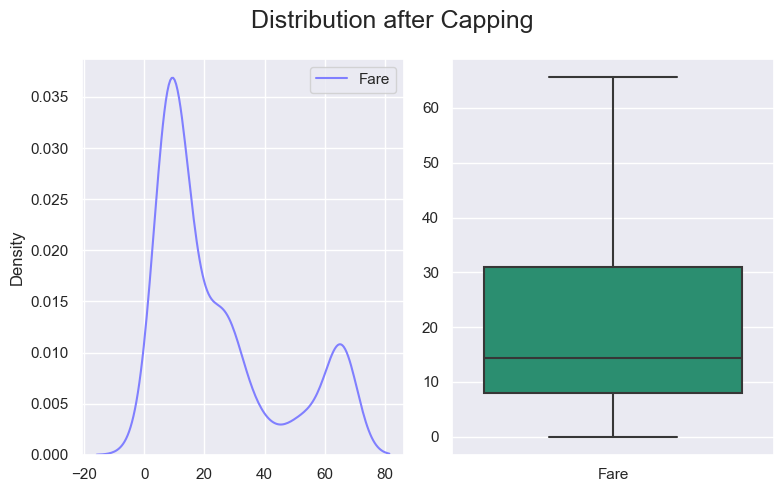

In [ ]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_skew_new, palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df_skew_new, palette="Dark2")
plt.tight_layout()
plt.show()

> Обратите внимание, как мы избавились от выбросов. Кроме того, поскольку значения выбросов были заменены максимальным и минимальным пределом, обратите внимание, как на PDF или KDEplot появляется выпуклость или больше значений вблизи 60-80.

Выбросы часто рассматриваются при работе с асимметричными (скошенными) распределениями, такими как скошенное вправо (positive skewness) или скошенное влево (negative skewness). Вот несколько примеров ситуаций, когда можно рассмотреть удаление выбросов для асимметричного распределения:

1. **Доходы населения:**
   - Распределение доходов населения часто является скосным вправо из-за наличия небольшого числа людей с очень высоким доходом. Удаление выбросов может быть оправданным, если цель анализа — изучение общего распределения доходов среди большинства населения.

2. **Время ответа в системе обслуживания:**
   - Если мы измеряем время ответа в системе обслуживания клиентов, то из-за случайных факторов или возможных технических проблем, время ответа может быть искажено. Удаление выбросов в этом случае может помочь более точно оценить типичное время ожидания.

3. **Продажи товаров:**
   - В случае продаж, где большинство транзакций может иметь небольшие суммы, но есть также транзакции с очень высокими суммами (например, крупные корпоративные заказы), удаление выбросов может быть целесообразным для более точного анализа общих тенденций в продажах.

4. **Результаты экспериментов:**
   - В научных экспериментах, где измеряются значения событий, смещенных вправо или влево, выбросы могут возникнуть из-за систематических ошибок или неожиданных факторов. Удаление выбросов может помочь обеспечить более чистое представление результатов эксперимента.

Важно отметить, что принятие решения об удалении выбросов зависит от целей анализа и контекста конкретной задачи. При этом также важно оценивать влияние удаления выбросов на статистические характеристики данных и давать обоснование выбора метода обработки.

### Метод перцентилей

В методе процентилей вы определяете конкретный порог в процентилях. Можно использовать ту же функцию, которую использовали для q1 и q2 при определении IQR.

Определяем определенный порог, например, все, что выше 98 перцентиля и ниже 2 перцентиля, будет считаться выбросом. Затем можно использовать обрезку или усечение, чтобы справиться с ними.

Процентный метод является произвольным, и придется определять значение вручную, и здесь вам очень помогут знания домена. Знание домена - самая сильная опора в разработке функций. Если вы не знаете о данных, начните гуглить и узнавать о них больше. Узнайте больше о функциях, и у вас разовьется базовая интуиция, и вы, возможно, найдете собственный способ обработки выбросов. Экспериментируйте, делайте пробы и ошибки и получайте удовольствие от работы с ML. Продолжайте работать!

## Ссылки
https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods#6.-Isolation-Forest

https://www.dmitrymakarov.ru/data-analysis/outliers-09/